In [4]:
# pip install hvplot

In [5]:
# Dependencies
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# import hvplot.pandas as hvplot
import plotly as plt
import plotly.express as px

In [6]:
# Read in candidates data
df1 = pd.read_csv("candidates_clean_st.csv")
df_cand = df1.copy()
df_cand.head()

,unique_key,id,cycle,fec_cand_id,cid,first_last_party,party,dist_id_run_for,dist_id_currently_held,current_candidate,cycle_candidate,crpico,recip_code,nopacs,raised_from_pacs,raised_from_individuals,raised_total,raised_unitemized,state,result
0,1996N00000948,56756,1996,P80001118,N00000948,Lenora B Fulani (3),3,PRES,,,,C,3L,,0.0,6000.0,6000,0.0,PR,L
1,1996N00004451,58068,1996,S6MN00143,N00004451,Stephen Bonsal Young (R),R,MNS1,,,Y,C,RL,,492.0,97408.0,264254,166354.0,MN,L
2,1996N00001670,57382,1996,S6DE00073,N00001670,Raymond J Clatworthy (R),R,DES2,,Y,Y,C,RL,,202815.0,618935.0,1636414,814664.0,DE,L
3,1996N00000525,57290,1996,S4VT00066,N00000525,Gavin Terence Mills (I),U,VTS1,,,,C,3L,,0.0,266.0,266,0.0,VT,L
4,1996N00005551,53386,1996,H2OK05045,N00005551,Ernest J Istook (R),R,OK05,OK05,Y,Y,I,RW,,130384.0,99600.0,399980,169996.0,OK,W


In [7]:
# Read in PAC data 
# df2 = pd.read_csv("pacs.csv", on_bad_lines='skip')
# df_pac = df2.copy()
# df_pac.head()

# Cleaned
# df2 = pd.read_csv('pacs_clean.csv')
# df_pac = df2.copy()
# df_pac.head()

## <font color = 'gold'>Clean

In [8]:
# Handle nulls
# df_pac.isnull().sum()

In [9]:
# df_pac = df_pac.dropna()

In [10]:
# df_pac.duplicated().sum()

In [11]:
# Drop duplicates
# df_pac = df_pac.drop_duplicates()

In [12]:
# df_pac.to_csv('pacs_clean.csv')

In [13]:
# # Join pac and candidates dfs
# df_paccand = df_cand.merge(df_pac, how='left', on='cid')
# df_paccand.head()

## <font color = 'gold'>Explore Features

In [14]:
# See if cycle_candidate is significant
# if there are W and blank c_c, then it's significant
# if there L for every blank c_c, insignificant - drop
# df3 = df_cand[(df_cand['cycle_candidate'] == ' ') & (df_cand['result'] == 'W')]
# df3.head(10)

# KEEP for now, but test both ways.

In [15]:
# Choose columns for features
columns = ['party', 'crpico', 'raised_from_pacs', 'raised_from_individuals',	'raised_total',	'raised_unitemized', 'result']

# # consider dropping later:
#   #cycle_candidate
#   #nopacs
#   #dist_id_currently_held

df_features = df_cand[columns]
df_features.head()

,party,crpico,raised_from_pacs,raised_from_individuals,raised_total,raised_unitemized,result
0,3,C,0.0,6000.0,6000,0.0,L
1,R,C,492.0,97408.0,264254,166354.0,L
2,R,C,202815.0,618935.0,1636414,814664.0,L
3,U,C,0.0,266.0,266,0.0,L
4,R,I,130384.0,99600.0,399980,169996.0,W


In [16]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19863 entries, 0 to 19862
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   party                    19863 non-null  object 
 1   crpico                   19863 non-null  object 
 2   raised_from_pacs         19863 non-null  float64
 3   raised_from_individuals  19863 non-null  float64
 4   raised_total             19863 non-null  int64  
 5   raised_unitemized        19863 non-null  float64
 6   result                   19863 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.1+ MB


In [17]:
df_features.nunique()

party                          4
crpico                         5
raised_from_pacs           11607
raised_from_individuals    15530
raised_total               17987
raised_unitemized          14653
result                         2
dtype: int64

## <font color = 'gold'>Preprocessing
### Categorical Variables
#### <font color = 'skyblue'>Bucket

In [18]:
for col in df_features.columns:
  print(df_features[col].value_counts())

# drop nopacs, bucket crpico 

R    9746
D    8779
U     786
3     552
Name: party, dtype: int64
C    9506
I    5675
O    4596
       85
3       1
Name: crpico, dtype: int64
0.0         4435
1000.0       343
500.0        243
5000.0       157
2000.0       147
            ... 
570.0          1
421654.0       1
435193.0       1
10098.0        1
345241.0       1
Name: raised_from_pacs, Length: 11607, dtype: int64
 0.0          865
 1000.0       129
 500.0        124
 250.0         64
 200.0         54
             ... 
 5616.0         1
 153472.0       1
 9658.0         1
 1154484.0      1
-127.0          1
Name: raised_from_individuals, Length: 15530, dtype: int64
 500        107
 1000        79
 200         42
 250         41
 300         32
           ... 
 2260         1
 27975        1
 969956       1
 8680358      1
-127          1
Name: raised_total, Length: 17987, dtype: int64
0.0         2977
100.0         49
200.0         27
50.0          21
1000.0        20
            ... 
26541.0        1
212783.0       1
1

In [19]:
# state_1 = list(df_features.state.value_counts().index)

In [20]:
# get value counts variable
crpico_type = df_features['crpico'].value_counts()
crpico_type

C    9506
I    5675
O    4596
       85
3       1
Name: crpico, dtype: int64

In [21]:
# Determine which values to replace if counts are less than 100?
replace_crpico = list(crpico_type[crpico_type < 100].index)

# Replace in dataframe
for cls in replace_crpico:
    df_features.crpico = df_features.crpico.replace(cls,"Other")
    
# Check to make sure binning was successful
df_features.crpico.value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


C        9506
I        5675
O        4596
Other      86
Name: crpico, dtype: int64

In [22]:
# encode W/L of 'result' column by mapping
x = {'W': 1, 'L': 0}
df_features = df_features.replace(x)
df_features.head()

,party,crpico,raised_from_pacs,raised_from_individuals,raised_total,raised_unitemized,result
0,3,C,0.0,6000.0,6000,0.0,0
1,R,C,492.0,97408.0,264254,166354.0,0
2,R,C,202815.0,618935.0,1636414,814664.0,0
3,U,C,0.0,266.0,266,0.0,0
4,R,I,130384.0,99600.0,399980,169996.0,1


In [23]:
df_features.nunique()

party                          4
crpico                         4
raised_from_pacs           11607
raised_from_individuals    15530
raised_total               17987
raised_unitemized          14653
result                         2
dtype: int64

In [24]:
df_features.party.value_counts()

R    9746
D    8779
U     786
3     552
Name: party, dtype: int64

In [25]:
# get value counts variable
party_type = df_features['party'].value_counts()
party_type

# Determine which values to replace if counts are less than 100?
rep_party = list(party_type[party_type < 1000].index)

# Replace in dataframe
for cls in rep_party:
    df_features.party = df_features.party.replace(cls,"Other")
    
# Check to make sure binning was successful
df_features.party.value_counts()

R        9746
D        8779
Other    1338
Name: party, dtype: int64

#### <font color = 'skyblue'>Encode

In [26]:
# # Encode State with label encoder ###############
# le = LabelEncoder()
# df_features['state'] = le.fit_transform(df_features['state'])

In [27]:
# generate categorical variable list
catvars = df_features.dtypes[df_features.dtypes == 'object'].index
catvars

Index(['party', 'crpico'], dtype='object')

In [28]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_features[catvars]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(catvars)
encode_df.head()

,party_D,party_Other,party_R,crpico_C,crpico_I,crpico_O,crpico_Other
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [29]:
# Merge one-hot encoded features and drop the originals
encoded_df = df_features.merge(encode_df, left_index=True, right_index=True)
encoded_df = encoded_df.drop(catvars, axis=1)
encoded_df.head()

,raised_from_pacs,raised_from_individuals,raised_total,raised_unitemized,result,party_D,party_Other,party_R,crpico_C,crpico_I,crpico_O,crpico_Other
0,0.0,6000.0,6000,0.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,492.0,97408.0,264254,166354.0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,202815.0,618935.0,1636414,814664.0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,266.0,266,0.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,130384.0,99600.0,399980,169996.0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0


#### <font color= 'skyblue'>Create Features and Target Arrays

In [30]:
# Split preprocessed data into features and target arrays
X = encoded_df.drop('result', axis=1).values
y = df_features.result.values

<font color= 'skyblue'>Split to Training and Testing data

In [31]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

<font color= 'skyblue'>Standard Scale

In [32]:
# Scale / Standardize feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
# view data to ensure successful standardization
X_train_scaled[:1]

array([[-0.28187481, -0.08585769, -0.14678781, -0.19442638, -0.89358993,
        -0.2692549 ,  1.02343352,  1.04934663, -0.63648428, -0.54867844,
        -0.06619982]])

## <font color='gold'>Model - Random Forest Classifier

In [33]:
# Resample the training data with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=43)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=43)

In [34]:
# Calculate the accuracy score
y_true = y_test
y_pred = clf.predict(X_test_scaled)
print(f"Accuracy Score: {accuracy_score(y_true, y_pred)}")
print("\n---------------------------------------------------------------------------------\n")


# Display the confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, index=["Lose", "Win"], columns=["Predicted Lose", "Predicted Win"])
print(cm_df)
print("\n---------------------------------------------------------------------------------\n")

# Print the imbalanced classification report
print(classification_report(y_true, y_pred))

Accuracy Score: 0.9291180024164317

---------------------------------------------------------------------------------

      Predicted Lose  Predicted Win
Lose            3198            215
Win              137           1416

---------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3413
           1       0.87      0.91      0.89      1553

    accuracy                           0.93      4966
   macro avg       0.91      0.92      0.92      4966
weighted avg       0.93      0.93      0.93      4966



## <font color='gold'>KMeans Clustering

In [35]:
# Initialize df from copy
df_clust = df1.copy()
df_clust.head()

,unique_key,id,cycle,fec_cand_id,cid,first_last_party,party,dist_id_run_for,dist_id_currently_held,current_candidate,cycle_candidate,crpico,recip_code,nopacs,raised_from_pacs,raised_from_individuals,raised_total,raised_unitemized,state,result
0,1996N00000948,56756,1996,P80001118,N00000948,Lenora B Fulani (3),3,PRES,,,,C,3L,,0.0,6000.0,6000,0.0,PR,L
1,1996N00004451,58068,1996,S6MN00143,N00004451,Stephen Bonsal Young (R),R,MNS1,,,Y,C,RL,,492.0,97408.0,264254,166354.0,MN,L
2,1996N00001670,57382,1996,S6DE00073,N00001670,Raymond J Clatworthy (R),R,DES2,,Y,Y,C,RL,,202815.0,618935.0,1636414,814664.0,DE,L
3,1996N00000525,57290,1996,S4VT00066,N00000525,Gavin Terence Mills (I),U,VTS1,,,,C,3L,,0.0,266.0,266,0.0,VT,L
4,1996N00005551,53386,1996,H2OK05045,N00005551,Ernest J Istook (R),R,OK05,OK05,Y,Y,I,RW,,130384.0,99600.0,399980,169996.0,OK,W


In [36]:
# isolate first_last_
name = pd.DataFrame(df_clust.first_last_party)
name.head()

,first_last_party
0,Lenora B Fulani (3)
1,Stephen Bonsal Young (R)
2,Raymond J Clatworthy (R)
3,Gavin Terence Mills (I)
4,Ernest J Istook (R)


In [37]:
# Choose features
df_clust = df_clust[['party', 'state', 'crpico', 'raised_from_pacs',	'raised_from_individuals', 'raised_unitemized']]
df_clust.head()

,party,state,crpico,raised_from_pacs,raised_from_individuals,raised_unitemized
0,3,PR,C,0.0,6000.0,0.0
1,R,MN,C,492.0,97408.0,166354.0
2,R,DE,C,202815.0,618935.0,814664.0
3,U,VT,C,0.0,266.0,0.0
4,R,OK,I,130384.0,99600.0,169996.0


In [38]:
# encode cat variables
X = pd.get_dummies(df_clust, columns=['party','state','crpico'])
X.head()

,raised_from_pacs,raised_from_individuals,raised_unitemized,party_3,party_D,party_R,party_U,state_AK,state_AL,state_AR,...,state_VT,state_WA,state_WI,state_WV,state_WY,crpico_,crpico_3,crpico_C,crpico_I,crpico_O
0,0.0,6000.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,492.0,97408.0,166354.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,202815.0,618935.0,814664.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,266.0,0.0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,130384.0,99600.0,169996.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
# Standardize data
X_scaled = StandardScaler().fit_transform(X)
X_scaled[0:1]

array([[-1.96995688e-01, -8.95969907e-02, -1.04459677e-01,
         5.91470165e+00, -8.89967743e-01, -9.81493276e-01,
        -2.02981395e-01, -6.59430483e-02, -1.26120185e-01,
        -1.05342163e-01, -3.54994040e-02, -1.43359047e-01,
        -3.52561401e-01, -1.26941642e-01, -1.09890026e-01,
        -3.62033432e-02, -6.03159787e-02, -2.27323021e-01,
        -1.74659201e-01, -3.09429839e-02, -8.51558647e-02,
        -1.11057301e-01, -7.95799083e-02, -2.06849327e-01,
        -1.57029427e-01, -1.03121131e-01, -1.16060652e-01,
        -1.19574729e-01, -1.43724382e-01, -1.48575619e-01,
        -8.98299924e-02, -1.77847663e-01, -1.39094298e-01,
        -1.51383226e-01, -1.22905412e-02, -1.04113854e-01,
        -6.78414927e-02, -1.73584933e-01, -5.36462094e-02,
        -8.89717312e-02, -9.09621442e-02, -1.63474373e-01,
        -9.56292184e-02, -9.37346568e-02, -2.27690206e-01,
        -1.97128975e-01, -1.22571457e-01, -1.20007150e-01,
        -2.03786710e-01,  1.00170773e+01, -7.66440475e-0

### PCA

In [40]:
# Reduce dimensions using PCA
pca = PCA(n_components=3)
cand_pca = pca.fit_transform(X_scaled)

In [41]:
# Create a DataFrame with the three principal components.
pca_df = pd.DataFrame(data=cand_pca, columns=["PC 1", "PC 2", "PC 3"], index=df_clust.index)
pca_df.head(10)

,PC 1,PC 2,PC 3
0,1.581868,0.896743,4.520893
1,-0.652814,1.401843,1.116612
2,-0.270093,1.615085,0.557838
3,-0.981323,0.660866,2.708046
4,0.166011,0.856349,-1.832166
5,-0.671954,1.398358,0.649610
6,-0.710013,1.619315,0.649259
7,-0.357503,0.286590,0.140787
8,-0.179760,1.399737,-1.423556
9,-0.379630,-1.264111,1.254759


### Elbow Curve

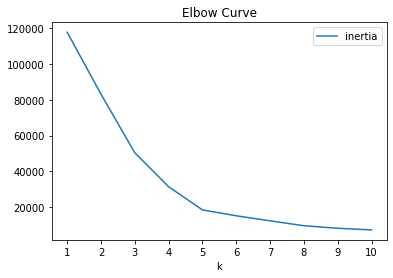

In [42]:
# Create an Elbow Curve to find the best value for K.

inertia = []
k = list(range(1,11))

# Get / store inertia values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)
    
# Define DF to plot Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.plot(kind='line', x='k', y='inertia', title="Elbow Curve", xticks=k)

Clustering

In [43]:
# Initialize the K-Means model.
model = KMeans(n_clusters=5, random_state=0)

# Fit the model
model.fit(pca_df)

# Predict clusters
predicts = model.predict(pca_df)

In [44]:
# Create a new DataFrame including predicted clusters and candidate features.
# Concatentate the df_clust and pcs_df DataFrames on the same columns.
clustered_df = df_clust.join(pca_df, how='inner')

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df = clustered_df.join(name, how='inner')

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df['Class'] = model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(19863, 11)


,party,state,crpico,raised_from_pacs,raised_from_individuals,raised_unitemized,PC 1,PC 2,PC 3,first_last_party,Class
0,3,PR,C,0.0,6000.0,0.0,1.581868,0.896743,4.520893,Lenora B Fulani (3),1
1,R,MN,C,492.0,97408.0,166354.0,-0.652814,1.401843,1.116612,Stephen Bonsal Young (R),0
2,R,DE,C,202815.0,618935.0,814664.0,-0.270093,1.615085,0.557838,Raymond J Clatworthy (R),0
3,U,VT,C,0.0,266.0,0.0,-0.981323,0.660866,2.708046,Gavin Terence Mills (I),1
4,R,OK,I,130384.0,99600.0,169996.0,0.166011,0.856349,-1.832166,Ernest J Istook (R),2
5,R,MI,C,0.0,5576.0,12474.0,-0.671954,1.398358,0.649610,Stephen Wayne Hofman (R),0
6,R,TX,C,2000.0,72177.0,110748.0,-0.710013,1.619315,0.649259,Olivia Coggin Eudaly (R),0
7,U,FL,O,0.0,3436.0,1946.0,-0.357503,0.286590,0.140787,H Harold Hardee (I),0
8,R,FL,O,500.0,40500.0,61320.0,-0.179760,1.399737,-1.423556,Joseph Dr Smith (R),2
9,D,MI,C,0.0,42841.0,35855.0,-0.379630,-1.264111,1.254759,Godfrey J Dillard (D),1


In [45]:
clustered_df.groupby('Class')['Class'].count()

Class
0    4946
1    4982
2    5053
3       8
4    4874
Name: Class, dtype: int64

In [46]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color="Class",
    symbol="Class",
    hover_name="first_last_party",
    hover_data=["crpico"],
    width=800
)
fig.update_layout(legend=dict(x=0,y=1))
fig.show()

## <font color='gold'>2022 Predictions

In [48]:
df3 = pd.read_csv('cand_summary_2022_clean.csv')
df_2022 = df3.copy()
df_2022.fillna('',inplace=True)
print(df_2022.party.value_counts())
df_2022 = df_2022[df_2022['raised_total'] > 0]
df_2022 = df_2022.reset_index().drop('index', axis=1)
df_2022.head()

R    2110
D    1551
3     706
Name: party, dtype: int64


,first_last_party,Cand_Office_St,Cand_Office,party,crpico,raised_from_pacs,raised_from_individuals,raised_total,raised_unitemized
0,"VIRASINGH, VICTORIA",VA,House,D,C,15650.00,225138.07,243859.84,62498.32
1,"CAO, HUNG",VA,House,R,C,32700.00,949909.38,982705.38,424071.73
2,"TAYLOR, BROOKE",VA,House,R,C,17400.00,48510.25,51410.25,1810.25
3,"CRUZ, ROBERT ROB",IL,Senate,R,C,0.00,140289.60,149729.76,19607.02
4,"FRANCE, MIKE",CT,House,R,C,22937.75,472898.26,495836.01,179880.71


In [49]:
features_2022 = df_2022.drop(['first_last_party','Cand_Office_St', 'Cand_Office'], axis=1)

In [50]:
cols = list(features_2022.columns)
new_cols = list((cols[1], cols[0]))
new_cols = new_cols + cols[2:]
features_2022 = features_2022[new_cols]
features_2022 = features_2022.reset_index().drop('index', axis=1)
features_2022.head()

,crpico,party,raised_from_pacs,raised_from_individuals,raised_total,raised_unitemized
0,C,D,15650.00,225138.07,243859.84,62498.32
1,C,R,32700.00,949909.38,982705.38,424071.73
2,C,R,17400.00,48510.25,51410.25,1810.25
3,C,R,0.00,140289.60,149729.76,19607.02
4,C,R,22937.75,472898.26,495836.01,179880.71


In [51]:
# ##### Explore why States don't match up in both DFs
# features_2022.nunique()

In [52]:
# features_2022.party.value_counts()

In [53]:
# diff = []
# state_1
# state_2 = list(features_2022.Cand_Office_St.value_counts().index)
# for i in state_2:
#   if i in state_1:
#     continue
#   else:
#     diff.append(i)
# diff

In [54]:
# print(state_1)
# print(state_2)

In [55]:
# features_2022_us = features_2022[features_2022['Cand_Office_St'] == 'US']
# features_2022_us.raised_total.value_counts()

In [56]:
# features_2022 = features_2022[features_2022['Cand_Office_St'] != 'US']

#### <font color='skyblue'>Encode

In [57]:
# # Encode State with label encoder ###############
# le = LabelEncoder()
# features_2022['Cand_Office_St'] = le.fit_transform(features_2022['Cand_Office_St'])

In [58]:
# generate categorical variable list
catvars = features_2022.dtypes[features_2022.dtypes == 'object'].index
catvars

Index(['crpico', 'party'], dtype='object')

In [59]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(features_2022[catvars]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(catvars)
encode_df.head()

,crpico_,crpico_C,crpico_I,crpico_O,party_3,party_D,party_R
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [60]:
# Merge one-hot encoded features and drop the originals
encoded_df = features_2022.merge(encode_df, left_index=True, right_index=True)
encoded_df = encoded_df.drop(catvars, axis=1)
encoded_df.head()

,raised_from_pacs,raised_from_individuals,raised_total,raised_unitemized,crpico_,crpico_C,crpico_I,crpico_O,party_3,party_D,party_R
0,15650.00,225138.07,243859.84,62498.32,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,32700.00,949909.38,982705.38,424071.73,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,17400.00,48510.25,51410.25,1810.25,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.00,140289.60,149729.76,19607.02,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,22937.75,472898.26,495836.01,179880.71,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [61]:
# Split preprocessed data into features
X = encoded_df.values

In [62]:
# Scale / Standardize feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# view data to ensure successful standardization
X_scaled[:1]

array([[-0.28674329, -0.15698087, -0.18746009, -0.10679587, -0.019996  ,
         0.80782174, -0.4427016 , -0.5474854 , -0.23881838,  1.2255611 ,
        -1.097454  ]])

In [63]:
# Predict 2022 election Results
predictions_2022 = clf.predict(X_scaled)

In [64]:
preds = pd.Series(predictions_2022, name='preds')
predicted_2022 = df_2022.merge(preds, left_index=True, right_index=True)

In [67]:
pd.set_option('display.max_rows', None)
predicted_2022['preds'] = predicted_2022['preds'].replace({
    0: 'L',
    1: 'W'
})
predicted_2022 = predicted_2022.sort_values(by=['Cand_Office_St', 'first_last_party'], ignore_index=True)
predicted_2022

,first_last_party,Cand_Office_St,Cand_Office,party,crpico,raised_from_pacs,raised_from_individuals,raised_total,raised_unitemized,preds
0,"BEGICH, NICHOLAS III",AK,House,R,C,14598.74,638611.85,676925.52,712.18,L
1,"BRELSFORD, GREGG BOWYER MR.",AK,House,3,C,100.00,13610.00,14051.93,1610.00,W
2,"BYE, CHRIS",AK,House,3,O,99.27,2327.18,5242.07,571.48,L
3,"CHESBRO, PATRICIA",AK,Senate,D,C,500.00,40879.40,49452.82,15622.00,L
4,"COGHILL, JOHN B JR.",AK,House,R,O,0.00,26425.00,26425.00,3225.00,L
5,"CONSTANT, CHRISTOPHER",AK,House,D,C,6000.00,157582.05,164196.90,34154.93,L
6,"GRAY-JACKSON, ELVI",AK,Senate,D,C,0.00,141874.68,159251.66,28289.18,L
7,"GROSS, ALAN",AK,House,3,O,16000.00,691130.94,707130.94,141074.10,W
8,"GUNGURSTEIN, SHOSHANA",AK,Senate,3,C,0.00,7845.00,13045.00,1595.00,W
9,"LEE, HUHNKIE",AK,Senate,3,C,0.00,18745.60,25959.57,0.00,W


In [68]:
predicted_2022['preds'].value_counts()

L    2086
W     416
Name: preds, dtype: int64

In [69]:
predicted_2022.to_csv('prediction_results.csv', index=False)